In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2019,1,1)
end=datetime.date.today()

# Collect Data

In [0]:
nvr=web.DataReader("NVR","yahoo",start,end)
nvr.to_csv('nvr.csv')
bkng=web.DataReader("BKNG","yahoo",start,end)
bkng.to_csv('bkng.csv')
amzn=web.DataReader("AMZN","yahoo",start,end)
amzn.to_csv('amzn.csv')
goog=web.DataReader("GOOG","yahoo",start,end)
goog.to_csv('goog.csv')
fb=web.DataReader("FB","yahoo",start,end)
fb.to_csv('fb.csv')
msft=web.DataReader("MSFT","yahoo",start,end)
msft.to_csv('msft.csv')

In [0]:

directory = '../dataset/'
stocks = ['nvr.csv', 'bkng.csv', 'amzn.csv', 'goog.csv', 'fb.csv','msft.csv']


In [0]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [0]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
0,2420.820068,1721.699951,1539.130005,1045.849976,135.679993,101.120003
1,2381.939941,1663.119995,1500.280029,1016.059998,131.740005,97.400002
2,2412.830078,1717.550049,1575.390015,1070.709961,137.949997,101.930000
3,2471.010010,1711.819946,1629.510010,1068.390015,138.050003,102.059998
4,2494.959961,1686.920044,1656.579956,1076.280029,142.529999,102.800003
...,...,...,...,...,...,...
332,3163.840088,1439.319946,2314.080078,1233.670044,182.910004,169.809998
333,3196.530029,1520.530029,2372.709961,1341.479980,194.190002,177.429993
334,3100.000000,1480.569946,2474.000000,1348.660034,204.710007,179.210007
335,3036.899902,1448.790039,2286.040039,1320.609985,202.270004,174.570007


# Method 1

### Create a covarience matrix

In [0]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [0]:
cov_matrix

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
Close_x,0.000965,0.000330,0.000148,0.000271,0.000298,0.000317
Close_y,0.000330,0.000597,0.000213,0.000331,0.000334,0.000371
Close_x,0.000148,0.000213,0.000371,0.000282,0.000298,0.000323
Close_y,0.000271,0.000331,0.000282,0.000460,0.000392,0.000400
Close_x,0.000298,0.000334,0.000298,0.000392,0.000566,0.000410
Close_y,0.000317,0.000371,0.000323,0.000400,0.000410,0.000523


### Generate # of portfolios

In [0]:
num_portfolios = 60000
results = np.zeros((3,num_portfolios))

In [0]:
for i in range(num_portfolios):
    weights = np.random.random(cov_matrix.shape[0])
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]

### Display result frame

In [0]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

In [0]:
results_frame

,ret,stdev,sharpe
0,0.247659,0.293485,0.843857
1,0.255712,0.304073,0.840954
2,0.212023,0.306083,0.692696
3,0.282727,0.320113,0.883209
4,0.259524,0.300039,0.864969
...,...,...,...
59995,0.280334,0.290907,0.963654
59996,0.220662,0.304711,0.724168
59997,0.235167,0.301988,0.778731
59998,0.268997,0.284252,0.946334


### Visualise

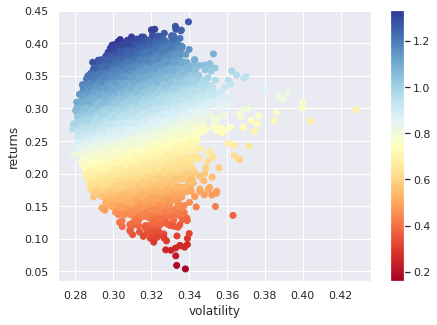

In [0]:
plt.figure(figsize = (7, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('volatility')
plt.ylabel('returns')
plt.show()

# Method 2 

In [0]:
from bs4 import BeautifulSoup
import requests
import datetime
import pandas as pd
import numpy as np
from pandas_datareader import data as wb

In [0]:
start = '2018-01-01'
end = '2020-05-05'

tickers = ['MMM',
'ABT',
'ABBV',
'ABMD',
'ACN',
'ATVI',
'AAPL',
'MSFT',
'AMZN',
'FB',
'GOOG',
'NVR',
'BKNG',
'GS',
'WHR',
'LMT']

thelen = len(tickers)

price_data = []
for ticker in tickers:
    prices = wb.DataReader(ticker, start = start, end = end, data_source='yahoo')[['Close']]
    price_data.append(prices.assign(ticker=ticker))


df = pd.concat(price_data)

pd.set_option('display.max_columns', 500)

df = df.reset_index()
df = df.set_index('Date')
table = df.pivot(columns='ticker')
table.to_csv('stock_price.csv')
table

Close                                                 \
ticker            AAPL        ABBV        ABMD        ABT         ACN   
Date                                                                    
2018-01-02  172.259995   98.410004  192.490005  58.790001  153.839996   
2018-01-03  172.229996   99.949997  195.820007  58.919998  154.550003   
2018-01-04  173.029999   99.379997  199.250000  58.820000  156.380005   
2018-01-05  175.000000  101.110001  202.320007  58.990002  157.669998   
2018-01-08  174.350006   99.489998  207.800003  58.820000  158.929993   
...                ...         ...         ...        ...         ...   
2020-04-28  278.579987   82.760002  164.399994  91.459999  178.360001   
2020-04-29  287.730011   83.760002  169.279999  92.279999  187.559998   
2020-04-30  293.799988   82.199997  191.250000  92.089996  185.190002   
2020-05-01  289.070007   82.839996  183.490005  89.849998  180.089996   
2020-05-04  293.160004   81.860001  181.000000  89.830002  179.529999   

                                                                          \
ticker             AMZN       ATVI         BKNG          FB         GOOG   
Date                                                                       
2018-01-02  1189.010010  64.309998  1784.750000  181.419998  1065.000000   
2018-01-03  1204.199951  65.309998  1824.160034  184.669998  1082.479980   
2018-01-04  1209.589966  64.660004  1807.250000  184.330002  1086.400024   
2018-01-05  1229.140015  66.370003  1823.540039  186.850006  1102.229980   
2018-01-08  1246.869995  66.629997  1851.810059  188.279999  1106.939941   
...                 ...        ...          ...         ...          ...   
2020-04-28  2314.080078  63.860001  1439.319946  182.910004  1233.670044   
2020-04-29  2372.709961  64.790001  1520.530029  194.190002  1341.479980   
2020-04-30  2474.000000  63.730000  1480.569946  204.710007  1348.660034   
2020-05-01  2286.040039  64.720001  1448.790039  202.270004  1320.609985   
2020-05-04  2315.989990  66.699997  1413.300049  205.259995  1326.800049   

                                                                         \
ticker              GS         LMT         MMM        MSFT          NVR   
Date                                                                      
2018-01-02  255.669998  318.540009  235.639999   85.949997  3529.610107   
2018-01-03  253.289993  321.209991  235.630005   86.349998  3562.830078   
2018-01-04  256.829987  326.720001  238.710007   87.110001  3520.510010   
2018-01-05  255.520004  329.679993  240.570007   88.190002  3567.000000   
2018-01-08  251.809998  328.160004  239.789993   88.279999  3624.800049   
...                ...         ...         ...         ...          ...   
2020-04-28  187.009995  384.730011  157.610001  169.809998  3163.840088   
2020-04-29  190.029999  387.910004  156.259995  177.429993  3196.530029   
2020-04-30  183.419998  389.059998  151.919998  179.210007  3100.000000   
2020-05-01  177.100006  383.470001  148.600006  174.570007  3036.899902   
2020-05-04  176.029999  380.160004  148.399994  178.839996  3062.679932   

                        
ticker             WHR  
Date                    
2018-01-02  167.990005  
2018-01-03  168.839996  
2018-01-04  168.820007  
2018-01-05  168.479996  
2018-01-08  169.050003  
...                ...  
2020-04-28  113.849998  
2020-04-29  122.500000  
2020-04-30  111.739998  
2020-05-01  112.190002  
2020-05-04  106.019997  

[588 rows x 16 columns]

In [0]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
df = pd.read_csv("stock_price 2.csv", parse_dates=True, index_col="Date")

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
#print(cleaned_weights)
cleaned_weights

ef.portfolio_performance(verbose=True)



Expected annual return: 35.9%
Annual volatility: 31.0%
Sharpe Ratio: 1.09


(0.3590787414906296, 0.30972724045227856, 1.0947656428136272)

# Method 3


In [3]:
pip install quandl

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
df1 = pd.read_csv("stock_price 3.csv", parse_dates=True, index_col="Date")
df1.head()

,AAPL,AMZN,FB,GOOG,GS,MSFT
Date,,,,,,
2018-01-02,172.259995,1189.010010,181.419998,1065.000000,255.669998,85.949997
2018-01-03,172.229996,1204.199951,184.669998,1082.479980,253.289993,86.349998
2018-01-04,173.029999,1209.589966,184.330002,1086.400024,256.829987,87.110001
2018-01-05,175.000000,1229.140015,186.850006,1102.229980,255.520004,88.190002
2018-01-08,174.350006,1246.869995,188.279999,1106.939941,251.809998,88.279999


Text(0, 0.5, 'price in $')

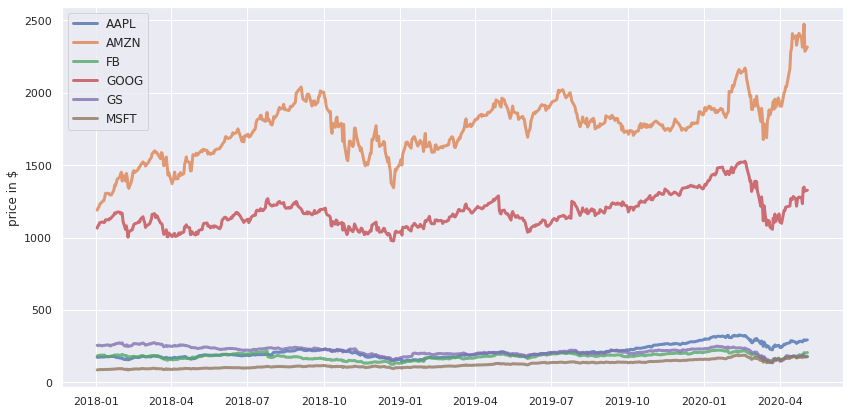

In [0]:
plt.figure(figsize=(14, 7))
for c in df1.columns.values:
    plt.plot(df1.index, df1[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

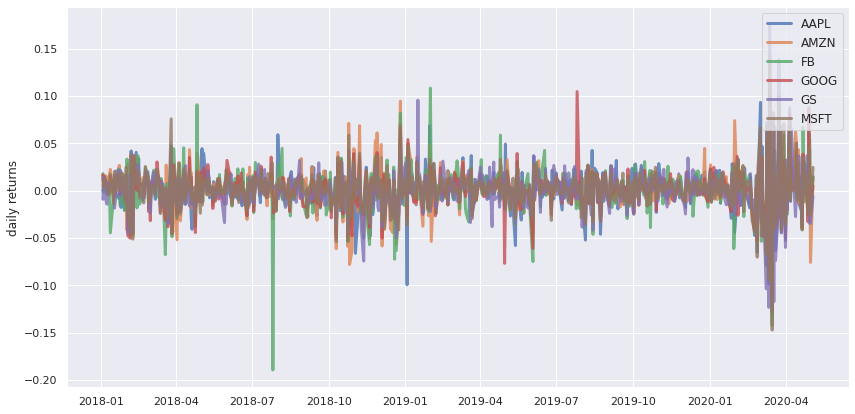

In [0]:
returns = df1.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### Random profolio generation

In [0]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(6)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [0]:
returns = df1.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
# The rate of 1.52% is the 52week treasury bill rates at the start of 2020.
risk_free_rate = 0.0152 

In [0]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='RdYlBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='g',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='m',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.33
Annualised Volatility: 0.3


             AAPL   AMZN    FB  GOOG    GS   MSFT
allocation  20.02  34.98  1.86  1.19  1.71  40.22
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.16
Annualised Volatility: 0.29


            AAPL   AMZN    FB   GOOG    GS  MSFT
allocation  5.26  34.38  5.13  29.77  25.1  0.36


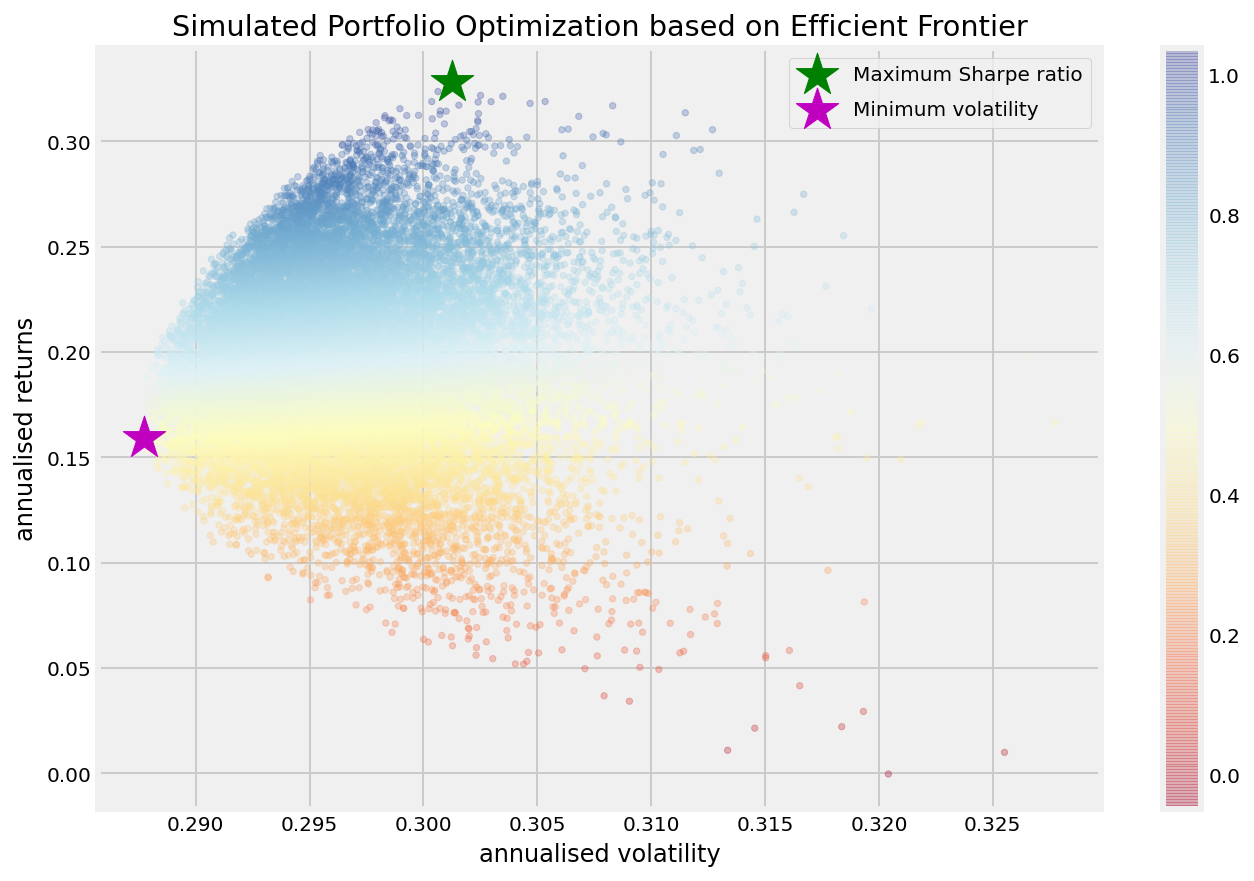

In [10]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### sharp ratio

In [0]:
returns = df1.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0152

In [0]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='RdYlBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='g',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='m',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.34
Annualised Volatility: 0.31


            AAPL   AMZN    FB  GOOG    GS   MSFT
allocation  1.99  32.43  0.11  2.07  2.23  61.17
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.29


            AAPL   AMZN    FB   GOOG     GS  MSFT
allocation  8.24  34.32  4.78  32.94  19.22   0.5


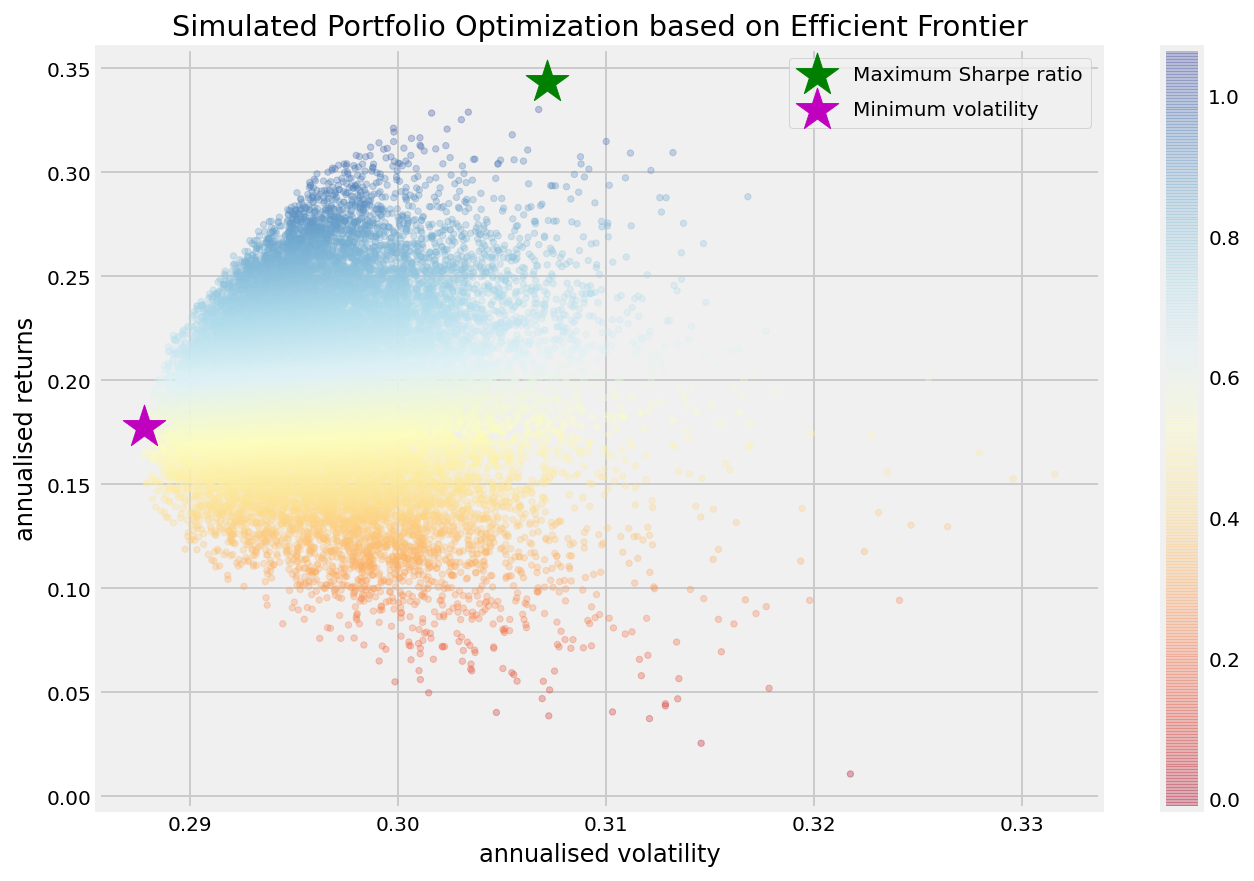

In [13]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### Efficient Frontier

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco

In [0]:

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [0]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [0]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [0]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    

    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='RdYlBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='g',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='m',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.36
Annualised Volatility: 0.31


            AAPL  AMZN   FB  GOOG   GS  MSFT
allocation   0.0  36.7  0.0   0.0  0.0  63.3
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.17
Annualised Volatility: 0.29


            AAPL   AMZN    FB   GOOG    GS  MSFT
allocation  8.91  34.35  5.91  28.22  22.6   0.0


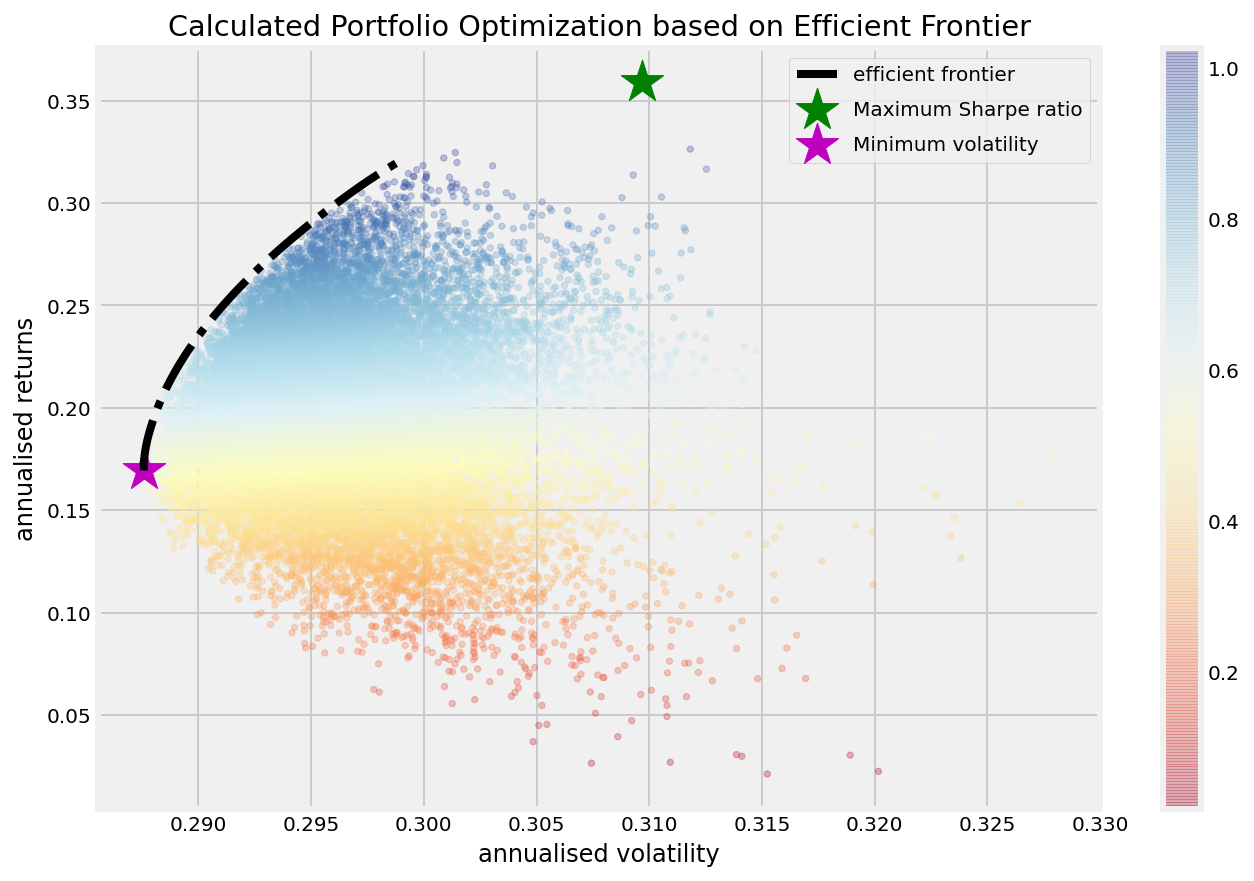

In [19]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [0]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(df1.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ( )
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(df1.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='g',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='m',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.36
Annualised Volatility: 0.31


            AAPL  AMZN   FB  GOOG   GS  MSFT
allocation   0.0  36.7  0.0   0.0  0.0  63.3
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.17
Annualised Volatility: 0.29


            AAPL   AMZN    FB   GOOG    GS  MSFT
allocation  8.91  34.35  5.91  28.22  22.6   0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : annuaised return 0.29 , annualised volatility: 0.35
AMZN : annuaised return 0.34 , annualised volatility: 0.33
FB : annuaised return 0.13 , annualised volatility: 0.38
GOOG : annuaised return 0.14 , annualised volatility: 0.32
GS : annuaised return -0.1 , annualised volatility: 0.36
MSFT : annuaised return 0.37 , annualised vol

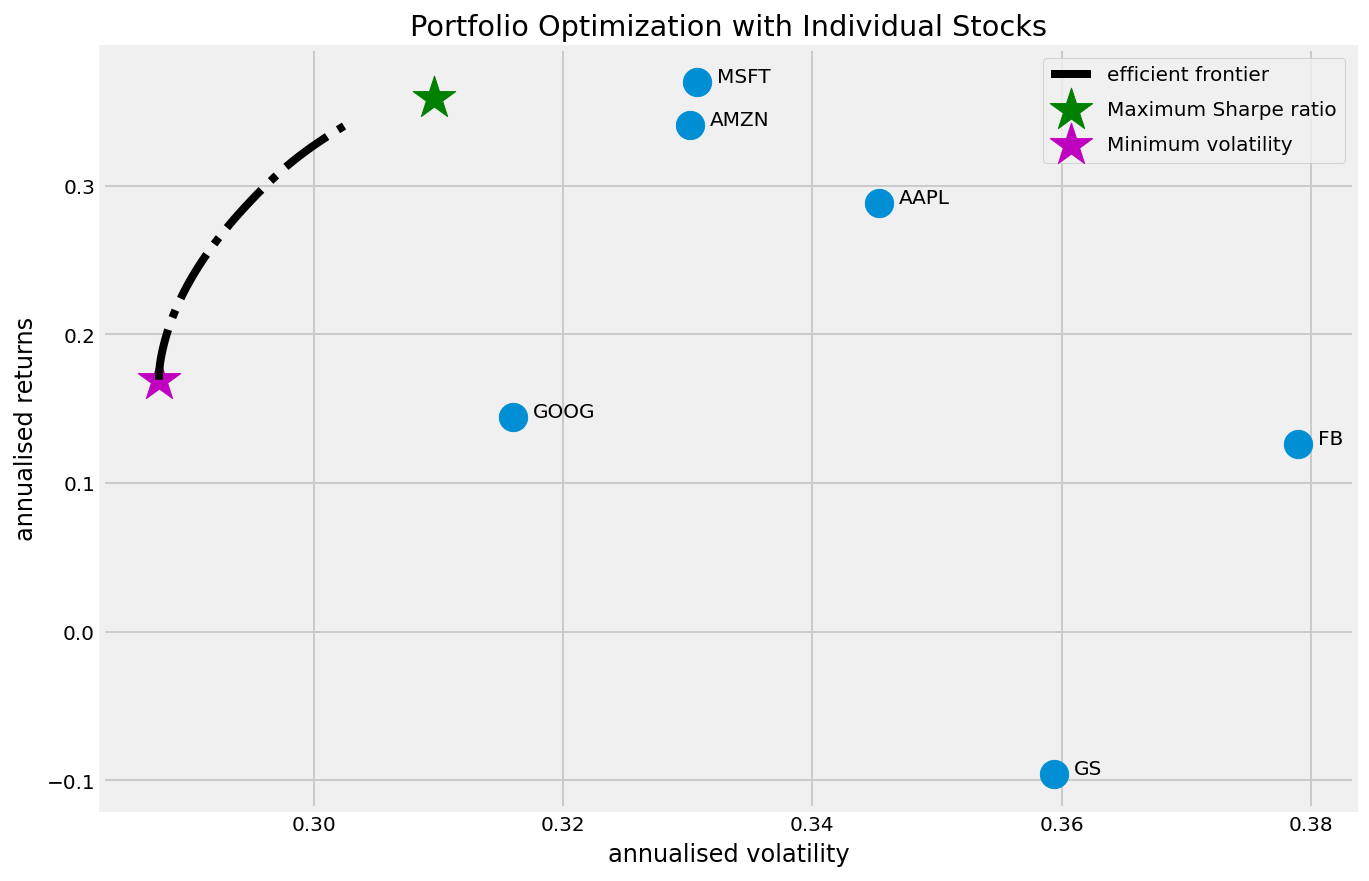

In [22]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)